This notebook shows some snippets to load data and perfom machine learning using caret library

In [21]:
# Data splitting - using the createDataPartition() command from the caret package
rm(list= ls())
library(caret); library(kernlab); data(spam)
inTrain <- createDataPartition(y=spam$type, p=0.75, list=FALSE)
# y - which outcome I want to split base on
# p - percentage of the training set 0.75 is 75%, 25% on the training set
training <- spam[inTrain,]
testing <- spam[-inTrain,]


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



In [22]:
# Data slicing - using the createFolds() command from caret
set.seed(32343)
folds <- createFolds(y=spam$type, k=10, list=TRUE, returnTrain=TRUE)
# k - how many folds
# list - return a list of indices when true
# returnTrain - TRUE=return the training set indices, FALSE=return the test set indices
sapply(folds,length) # check the size of each fold, we observe that the sample has been sliced equally on 10 groups

Fold01 Fold02 Fold03 Fold04 Fold05 Fold06 Fold07 Fold08 Fold09 Fold10 
  4141   4141   4140   4141   4141   4141   4141   4141   4141   4141

In [23]:
# Resampling with replacement of the values
set.seed(32343)
folds <- createResample(y=spam$type, times=10, list=TRUE)
sapply(folds,length) # check the size of each fold

Resample01 Resample02 Resample03 Resample04 Resample05 Resample06 Resample07 
      4601       4601       4601       4601       4601       4601       4601 
Resample08 Resample09 Resample10 
      4601       4601       4601

In [24]:
# Time slices (useful for forecasting)
set.seed(32343)
tme <- 1:1000
folds <- createTimeSlices(y=tme, initialWindow=20, horizon=10)
names(folds)

[1] "train" "test"

In [25]:
folds$train[[1]]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [26]:
folds$test[[1]]

[1] 21 22 23 24 25 26 27 28 29 30

In [27]:
# Fit a model (training) - using the train() command from the caret package
set.seed(32343)
modelFit <- train(type ~., data=training, method="glm")
# method Bootstraping or Cross-Validation
# metric Accuracy (default), Kappa, or RMSE, RSquared
# trControl=trainControl()
modelFit

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: algori

Generalized Linear Model 

3451 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3451, 3451, 3451, 3451, 3451, 3451, ... 
Resampling results

  Accuracy   Kappa      Accuracy SD  Kappa SD  
  0.9154383  0.8234304  0.02096892   0.03983044

 

In [28]:
modelFit$finalModel


Call:  NULL

Coefficients:
      (Intercept)               make            address                all  
       -1.435e+00         -4.947e-01         -1.392e-01         -1.052e-02  
            num3d                our               over             remove  
        2.466e+00          4.894e-01          7.912e-01          1.895e+00  
         internet              order               mail            receive  
        5.524e-01          5.431e-01          1.165e-01         -5.608e-01  
             will             people             report          addresses  
       -1.514e-01         -1.179e-02          1.190e-02          1.195e+00  
             free           business              email                you  
        1.035e+00          9.374e-01          1.531e-01          3.559e-02  
           credit               your               font             num000  
        7.885e-01          3.386e-01          1.350e-01          2.197e+00  
            money                 hp            

In [29]:
# Predict on new samples - using the predict command
predictions <- predict(modelFit, newdata=testing)
predictions[1:50]

[1] spam    spam    spam    spam    spam    spam    spam    nonspam spam   
[10] spam    spam    spam    spam    spam    spam    spam    spam    spam   
[19] spam    spam    nonspam spam    spam    spam    nonspam spam    spam   
[28] spam    spam    nonspam nonspam spam    spam    spam    spam    spam   
[37] spam    spam    spam    spam    spam    spam    spam    spam    spam   
[46] spam    spam    spam    spam    spam   
Levels: nonspam spam

In [30]:
# Confusion matrix (compare your predictions with the actual result)
confusionMatrix(predictions, testing$type)

Confusion Matrix and Statistics

          Reference
Prediction nonspam spam
   nonspam     668   47
   spam         29  406
                                         
               Accuracy : 0.9339         
                 95% CI : (0.918, 0.9476)
    No Information Rate : 0.6061         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.8606         
 Mcnemar's Test P-Value : 0.05117        
                                         
            Sensitivity : 0.9584         
            Specificity : 0.8962         
         Pos Pred Value : 0.9343         
         Neg Pred Value : 0.9333         
             Prevalence : 0.6061         
         Detection Rate : 0.5809         
   Detection Prevalence : 0.6217         
      Balanced Accuracy : 0.9273         
                                         
       'Positive' Class : nonspam        
                                         

In [31]:
# Plotting predictors using caret
rm(list = ls())
library(ISLR); library(ggplot2); library(caret);
data(Wage)
summary(Wage)

      year           age               sex                    maritl    
 Min.   :2003   Min.   :18.00   1. Male  :3000   1. Never Married: 648  
 1st Qu.:2004   1st Qu.:33.75   2. Female:   0   2. Married      :2074  
 Median :2006   Median :42.00                    3. Widowed      :  19  
 Mean   :2006   Mean   :42.41                    4. Divorced     : 204  
 3rd Qu.:2008   3rd Qu.:51.00                    5. Separated    :  55  
 Max.   :2009   Max.   :80.00                                           
                                                                        
       race                   education                     region    
 1. White:2480   1. < HS Grad      :268   2. Middle Atlantic   :3000  
 2. Black: 293   2. HS Grad        :971   1. New England       :   0  
 3. Asian: 190   3. Some College   :650   3. East North Central:   0  
 4. Other:  37   4. College Grad   :685   4. West North Central:   0  
                 5. Advanced Degree:426   5. South Atlantic  

In [32]:
inTrain <- createDataPartition(y=Wage$wage,p=0.7, list=FALSE)
training <- Wage[inTrain,]
testing <- Wage[-inTrain,]
dim(training); dim(testing)


[1] 2102   12

[1] 898  12

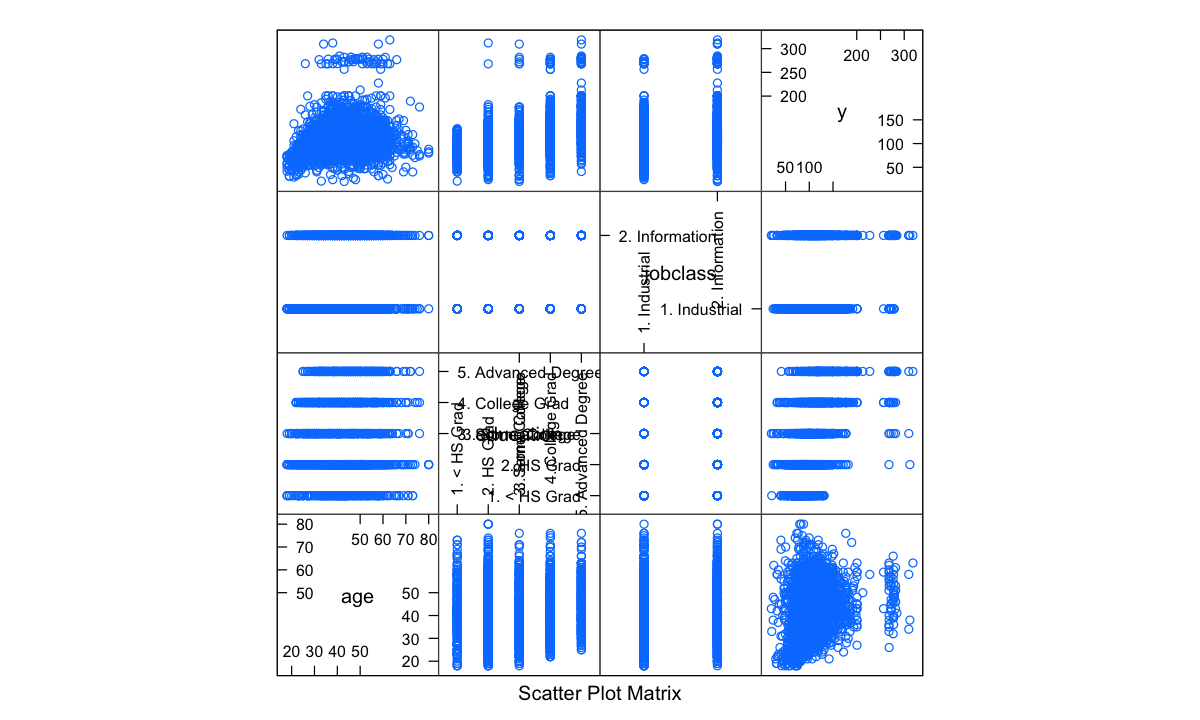

In [33]:
options(jupyter.plot_mimetypes = "image/png") 
options(repr.plot.width = 10, repr.plot.height = 6)
featurePlot(x=training[,c("age","education","jobclass")],y=training$wage, plot="pairs")

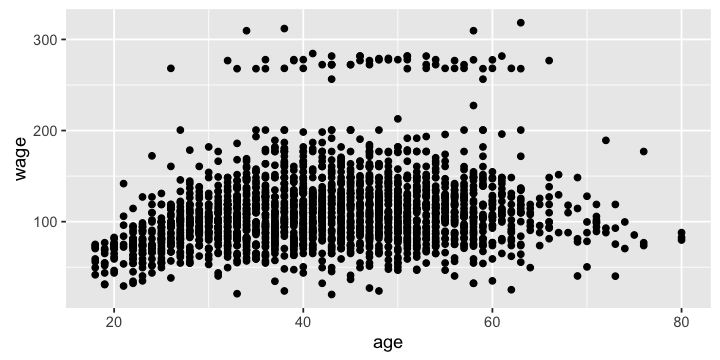

In [34]:
# Plotting predictors using ggplot2
options(repr.plot.width = 6, repr.plot.height = 3)
qplot(age, wage, data=training)

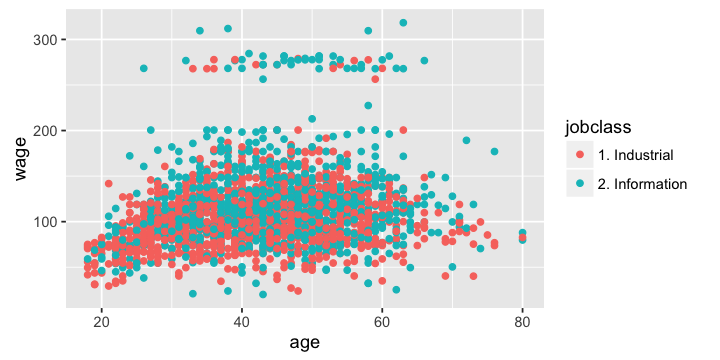

In [35]:
qplot(age, wage, colour=jobclass, data=training)

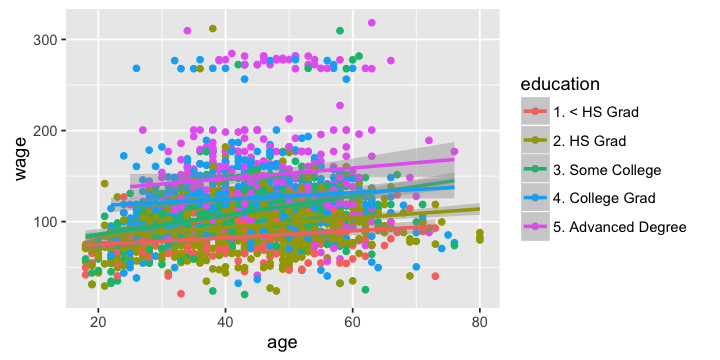

In [36]:
qplot(age, wage, colour=education, data=training) + geom_smooth(method='lm',formula= y~x)


Attaching package: 'gridExtra'

The following object is masked from 'package:randomForest':

    combine

The following object is masked from 'package:Hmisc':

    combine



cutWage
[ 20.1, 93.5) [ 93.5,118.9) [118.9,318.3] 
          715           700           687 

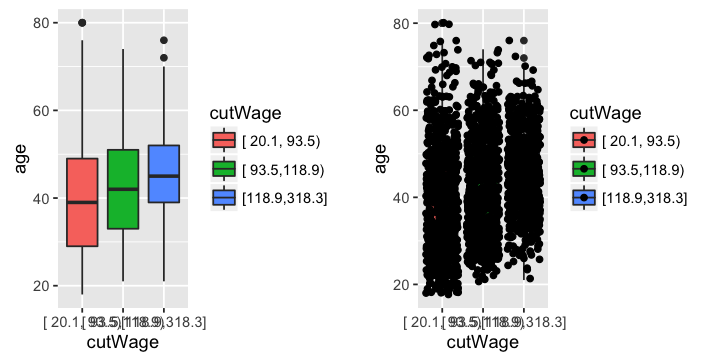

In [37]:
# Break to different categories
library(Hmisc); library(gridExtra)
cutWage <- cut2(training$wage,g=3)
table(cutWage)
p1 <- qplot(cutWage, age, data=training, fill=cutWage, geom=c("boxplot"))
p2 <- qplot(cutWage, age, data=training, fill=cutWage, geom=c("boxplot", "jitter"))
grid.arrange(p1, p2, ncol=2)

In [38]:
# looking at tables of data
t1 <-table (cutWage, training$jobclass)
t1

               
cutWage         1. Industrial 2. Information
  [ 20.1, 93.5)           447            268
  [ 93.5,118.9)           352            348
  [118.9,318.3]           284            403

In [39]:
prop.table(t1,1)

               
cutWage         1. Industrial 2. Information
  [ 20.1, 93.5)     0.6251748      0.3748252
  [ 93.5,118.9)     0.5028571      0.4971429
  [118.9,318.3]     0.4133916      0.5866084

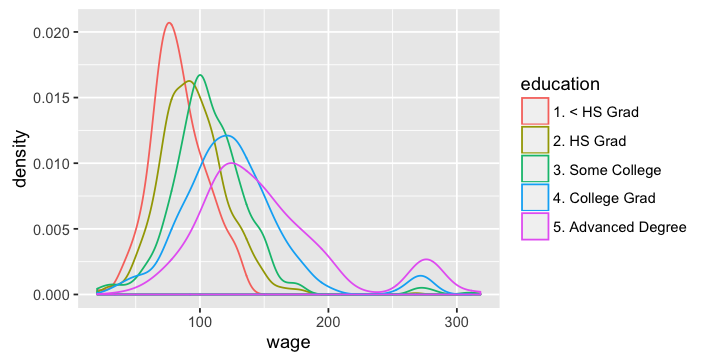

In [40]:
# Density plots
qplot(wage, colour=education, data=training, geom="density")

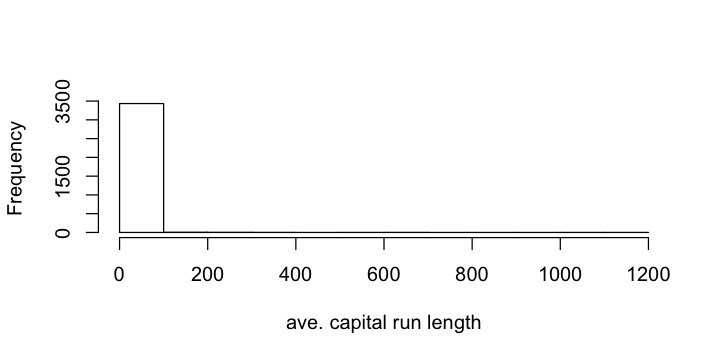

In [41]:
# Standardizing (when data are skewed)
# subscract their mean from the values and divide by their standard deviation
library(caret); library(kernlab); data(spam)
inTrain <- createDataPartition(y=spam$type,
                               p=0.75, list=FALSE)
training <- spam[inTrain,]
testing <- spam[-inTrain,]
hist(training$capitalAve,main="",xlab="ave. capital run length")

In [42]:
trainCapAve <- training$capitalAve
trainCapAveS <- (trainCapAve  - mean(trainCapAve))/sd(trainCapAve) 
mean(trainCapAveS)
sd(trainCapAveS)
testCapAve <- testing$capitalAve
testCapAveS <- (testCapAve  - mean(trainCapAve))/sd(trainCapAve) 
mean(testCapAveS)
sd(testCapAveS)

[1] -8.8369e-18

[1] 1

[1] -0.02679058

[1] 0.5740024

In [43]:
preObj <- preProcess(training[,-58],method=c("center","scale"))
trainCapAveS <- predict(preObj,training[,-58])$capitalAve
mean(trainCapAveS)
sd(trainCapAveS)
testCapAveS <- predict(preObj,testing[,-58])$capitalAve
mean(testCapAveS)
sd(testCapAveS)

[1] -8.8369e-18

[1] 1

[1] -0.02679058

[1] 0.5740024

In [44]:
# as an argument to the train() command
set.seed(32343)
modelFit <- train(type ~.,data=training,preProcess=c("center","scale"),method="glm")
modelFit

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted

Generalized Linear Model 

3451 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

Pre-processing: centered (57), scaled (57) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3451, 3451, 3451, 3451, 3451, 3451, ... 
Resampling results

  Accuracy  Kappa      Accuracy SD  Kappa SD  
  0.922388  0.8363122  0.007182872  0.01453939

 

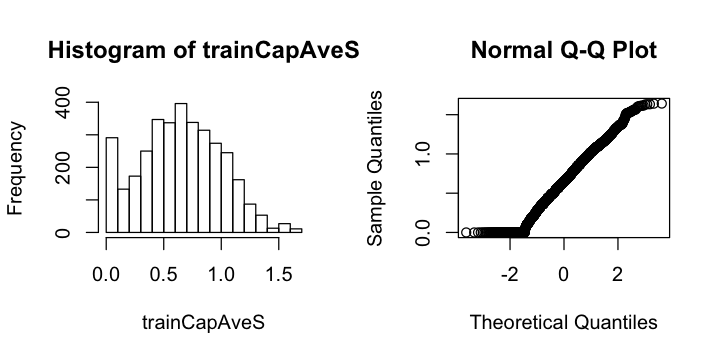

In [45]:
preObj <- preProcess(training[,-58],method=c("BoxCox"))
trainCapAveS <- predict(preObj,training[,-58])$capitalAve
par(mfrow=c(1,2)); hist(trainCapAveS); qqnorm(trainCapAveS)

In [46]:
# K-nearest neighbors imputation using preProcess()
preObj <- preProcess(training[,-58],method="knnImpute")
capAve <- predict(preObj,training[,-58])$capAve

In [47]:
# Covariance
nearZeroVar(training, saveMetrics=TRUE)[1:10,] 

,freqRatio,percentUnique,zeroVar,nzv
make,73.61111,3.853955,FALSE,TRUE
address,98.75,4.520429,FALSE,TRUE
all,60.11765,5.70849,FALSE,TRUE
num3d,1706,1.043176,FALSE,TRUE
our,97.59091,6.780643,FALSE,TRUE
over,100.5556,3.70907,FALSE,TRUE
remove,142.4,4.636337,FALSE,TRUE
internet,141.85,4.40452,FALSE,TRUE
order,120.2083,3.91191,FALSE,TRUE
mail,102.75,6.635758,FALSE,TRUE


In [48]:
library(splines)
bs(training$age,df=3) #b-splines basics for polynomial splines

Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'NULL'Warning message:
In min(x, na.rm = na.rm): no non-missing arguments to min; returning InfWarning message:
In max(x, na.rm = na.rm): no non-missing arguments to max; returning -Inf

ERROR: Error in splineDesign(Aknots, x, ord): length of 'derivs' is larger than length of 'x'


In [49]:
# Deep learning
# create features for image/voice that you cannot imagine

# Example prediction
data(iris); library(ggplot2)
names(iris)
table(iris$Species)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"


    setosa versicolor  virginica 
        50         50         50 

In [50]:
# Seperate the data
library(caret)
inTrain <-createDataPartition(y=iris$Species, p=0.7, list=FALSE)
training <- iris[inTrain,]
testing <- iris[-inTrain,]
dim(training);dim(testing)

[1] 105   5

[1] 45  5

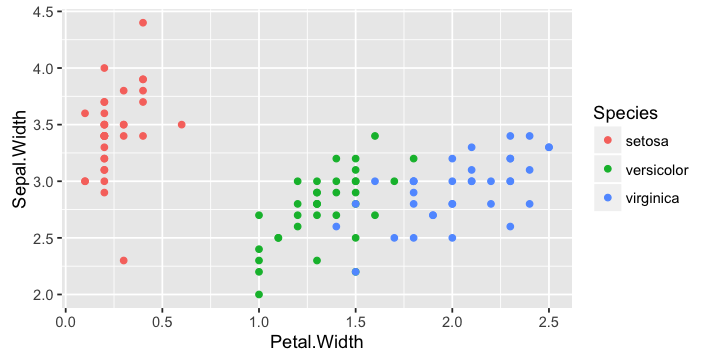

In [51]:
# Plot the data
qplot(Petal.Width,Sepal.Width,colour=Species,data=training)

In [52]:
# Looks like a classification problem, let's train a model as such
# rpart - Recursive Partitioning and Regression Trees
modFit<-train(Species ~ ., method="rpart", data=training)
print(modFit$finalModel)

Loading required package: rpart


n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Length< 4.75 31  1 versicolor (0.00000000 0.96774194 0.03225806) *
    7) Petal.Length>=4.75 39  5 virginica (0.00000000 0.12820513 0.87179487) *


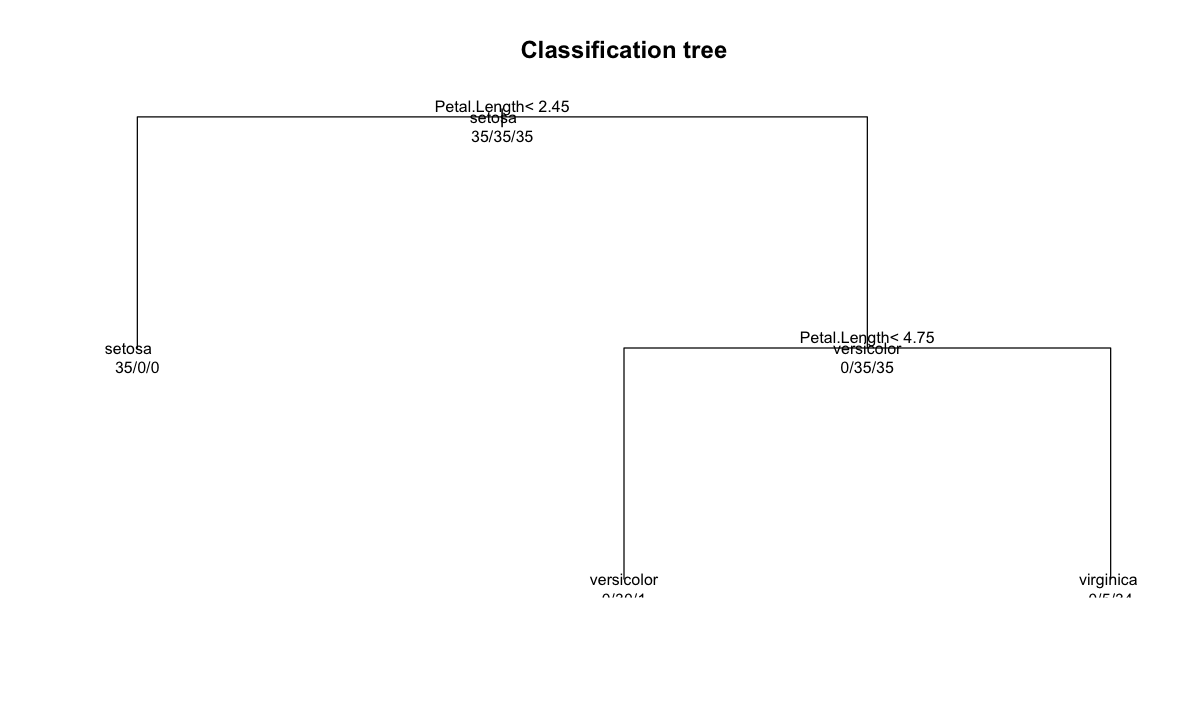

In [53]:
options(repr.plot.width = 10, repr.plot.height = 6)
# Print the classification tree (dendrogram)
plot(modFit$finalModel, uniform=TRUE, main="Classification tree")
text(modFit$finalModel, use.n=TRUE, all=TRUE, cex=.8)
options(repr.plot.width = 10, repr.plot.height = 6)

----

In [54]:
rm(list = ls())
library(caret)
library(ElemStatLearn)
library(Hmisc)
data(vowel.train)
data(vowel.test) 

In [55]:
vowel.train <- transform(vowel.train, y=factor(y))
vowel.test <- transform(vowel.test, y=factor(y))

In [56]:
set.seed(33833)
modFit <- train(y ~., data=vowel.train, method="rf", prox=TRUE)

In [57]:
print(modFit)

Random Forest 

528 samples
 10 predictor
 11 classes: '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 528, 528, 528, 528, 528, 528, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa      Accuracy SD  Kappa SD  
   2    0.9348086  0.9281044  0.01989488   0.02191478
   6    0.9084462  0.8990394  0.02196780   0.02423451
  10    0.8769423  0.8643308  0.02686962   0.02962649

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 


In [58]:
vi <- varImp(modFit$finalModel)
vi = data.frame(var = 1:nrow(vi), imp = vi$Overall)
vi[order(vi$imp),]

,var,imp
10,10,33.51387
7,7,34.41463
9,9,35.74176
3,3,36.70261
4,4,37.79053
8,8,42.49244
6,6,46.50431
5,5,53.25579
2,2,77.80346
1,1,80.85793


----

In [59]:
rm(list= ls())
library(AppliedPredictiveModeling)
library(caret)
data(AlzheimerDisease)
ls()

[1] "diagnosis"  "predictors"

In [60]:
dim(predictors)

[1] 333 130

In [61]:
str(predictors[,1:10])

'data.frame':	333 obs. of  10 variables:
 $ ACE_CD143_Angiotensin_Converti : num  2 1.56 1.52 1.68 2.4 ...
 $ ACTH_Adrenocorticotropic_Hormon: num  -1.386 -1.386 -1.715 -1.609 -0.968 ...
 $ AXL                            : num  1.098 0.683 -0.145 0.683 0.191 ...
 $ Adiponectin                    : num  -5.36 -5.02 -5.81 -5.12 -4.78 ...
 $ Alpha_1_Antichymotrypsin       : num  1.74 1.46 1.19 1.28 2.13 ...
 $ Alpha_1_Antitrypsin            : num  -12.6 -11.9 -13.6 -15.5 -11.1 ...
 $ Alpha_1_Microglobulin          : num  -2.58 -3.24 -2.88 -3.17 -2.34 ...
 $ Alpha_2_Macroglobulin          : num  -72.7 -154.6 -136.5 -98.4 -144.9 ...
 $ Angiopoietin_2_ANG_2           : num  1.065 0.742 0.833 0.916 0.956 ...
 $ Angiotensinogen                : num  2.51 2.46 1.98 2.38 2.86 ...


In [62]:
head(diagnosis, 3)
head(predictors, 3)[,1:10]

[1] Control Control Control
Levels: Impaired Control

,ACE_CD143_Angiotensin_Converti,ACTH_Adrenocorticotropic_Hormon,AXL,Adiponectin,Alpha_1_Antichymotrypsin,Alpha_1_Antitrypsin,Alpha_1_Microglobulin,Alpha_2_Macroglobulin,Angiopoietin_2_ANG_2,Angiotensinogen
1,2.0031,-1.386294,1.098387,-5.360193,1.740466,-12.63136,-2.577022,-72.65029,1.064711,2.510547
2,1.561856,-1.386294,0.6832816,-5.020686,1.458615,-11.90988,-3.244194,-154.6123,0.7419373,2.457283
3,1.52066,-1.714798,-0.1452763,-5.809143,1.193922,-13.64296,-2.882404,-136.5292,0.8329091,1.976365


In [63]:
# Partitioning data
adData = data.frame(diagnosis,predictors)
trainIndex = createDataPartition(diagnosis, p = 0.50,list=FALSE)
training = adData[trainIndex,]
testing = adData[-trainIndex,]

----

In [64]:
rm(list = ls())
library(AppliedPredictiveModeling)
data(concrete)
library(caret)
ls()

[1] "concrete" "mixtures"

In [65]:
# Split in test and train data 
set.seed(975)
inTrain = createDataPartition(mixtures$CompressiveStrength, p = 3/4)[[1]]
training = mixtures[ inTrain,]
testing = mixtures[-inTrain,]

In [66]:
library(Hmisc); library(gridExtra)

In [67]:
names <- colnames(concrete)
names <- names[-length(names)]

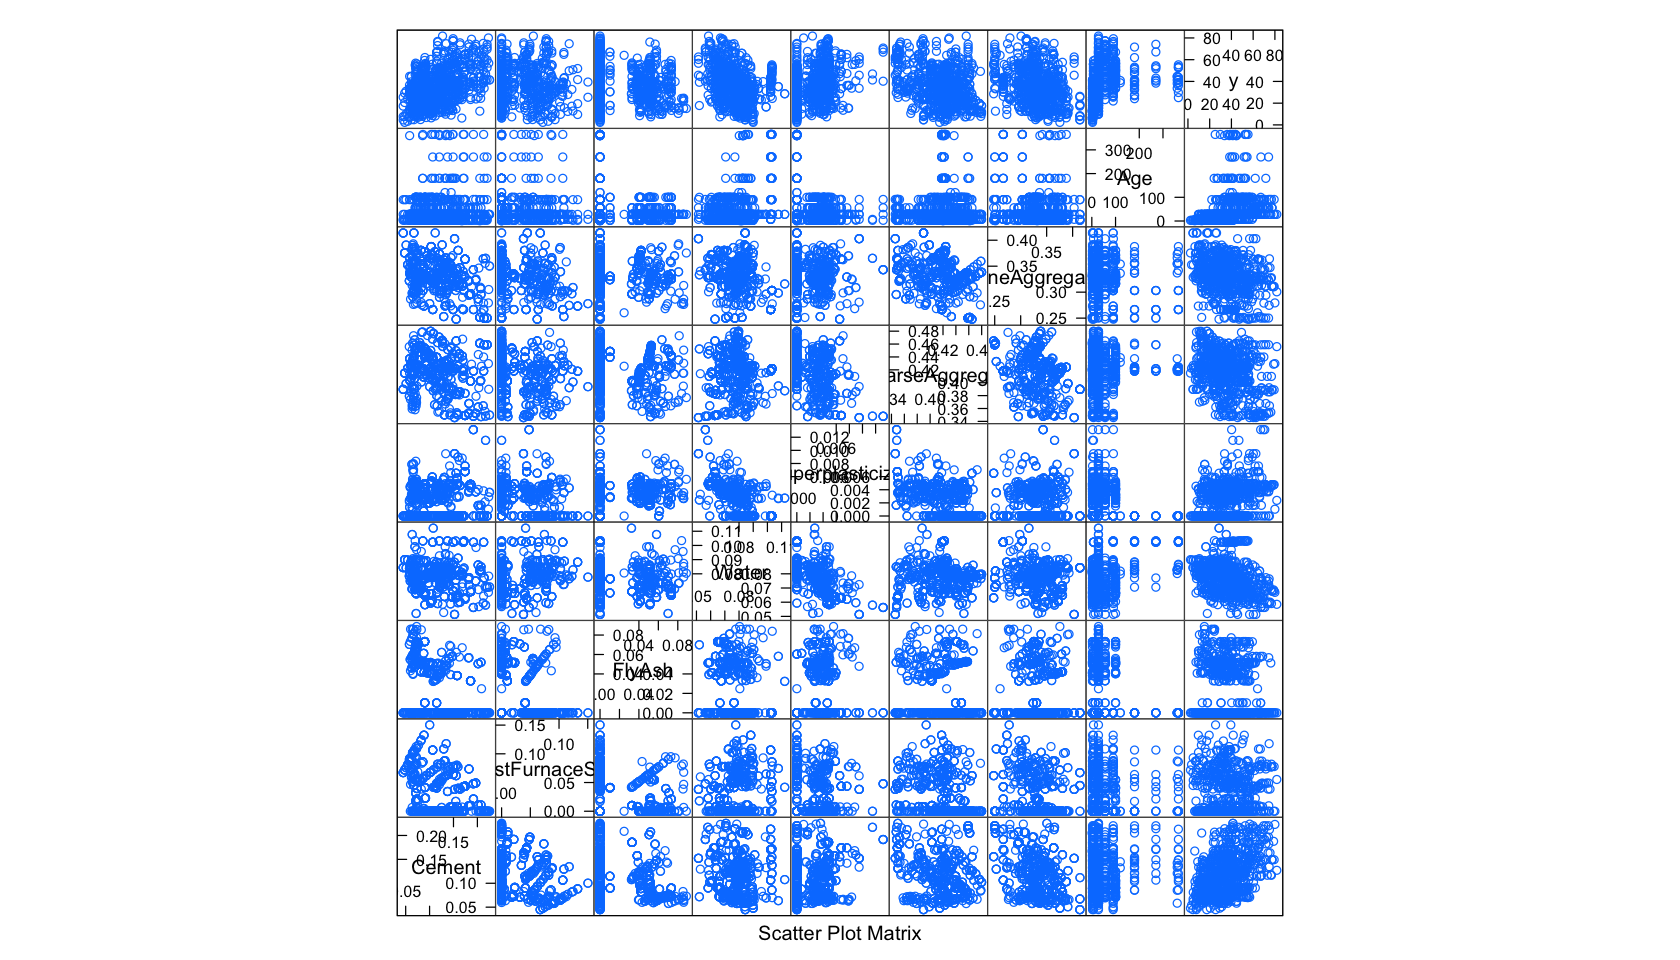

In [68]:
# Pair plot to see interation between variables
options(jupyter.plot_mimetypes = "image/png") 
options(repr.plot.width = 14, repr.plot.height = 8)
featurePlot(x = training[, names], y = training$CompressiveStrength, plot = "pairs")

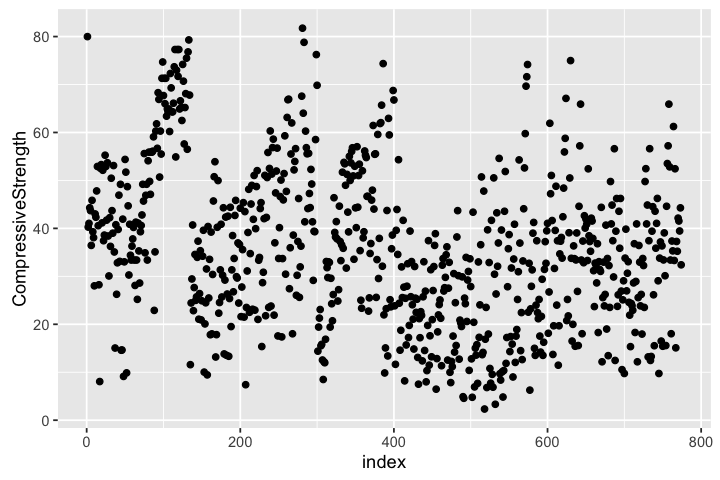

In [69]:
index <- seq_along(1:nrow(training))
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = training, aes(x = index, y = CompressiveStrength)) + geom_point() 

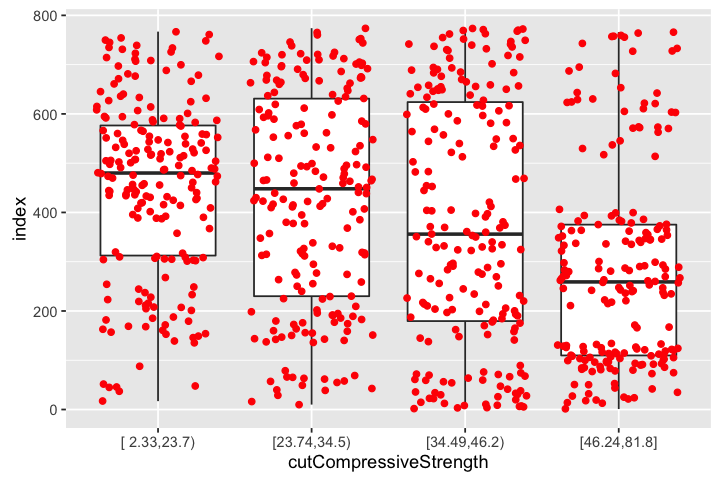

In [70]:
cutCompressiveStrength <- cut2(training$CompressiveStrength,g=4)
ggplot(data = training, aes(y = index, x = cutCompressiveStrength)) + geom_boxplot() + geom_jitter(col="red")

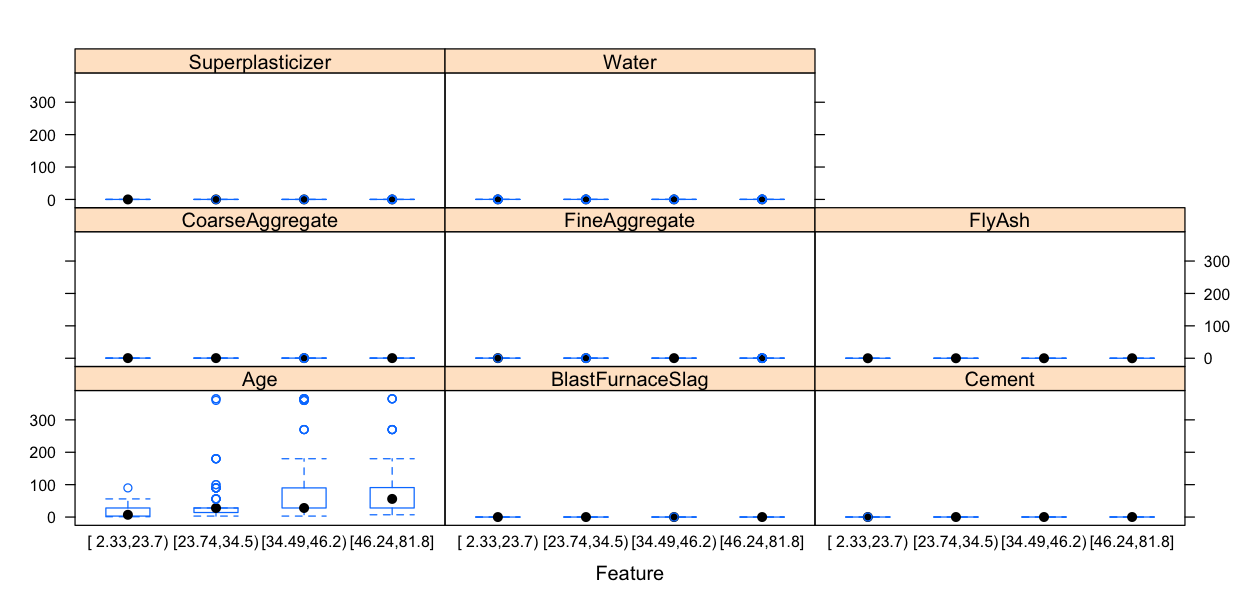

In [71]:
options(repr.plot.width = 10.5, repr.plot.height = 5)
featurePlot(x = training[, names], y = cutCompressiveStrength, plot = "box")

----

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


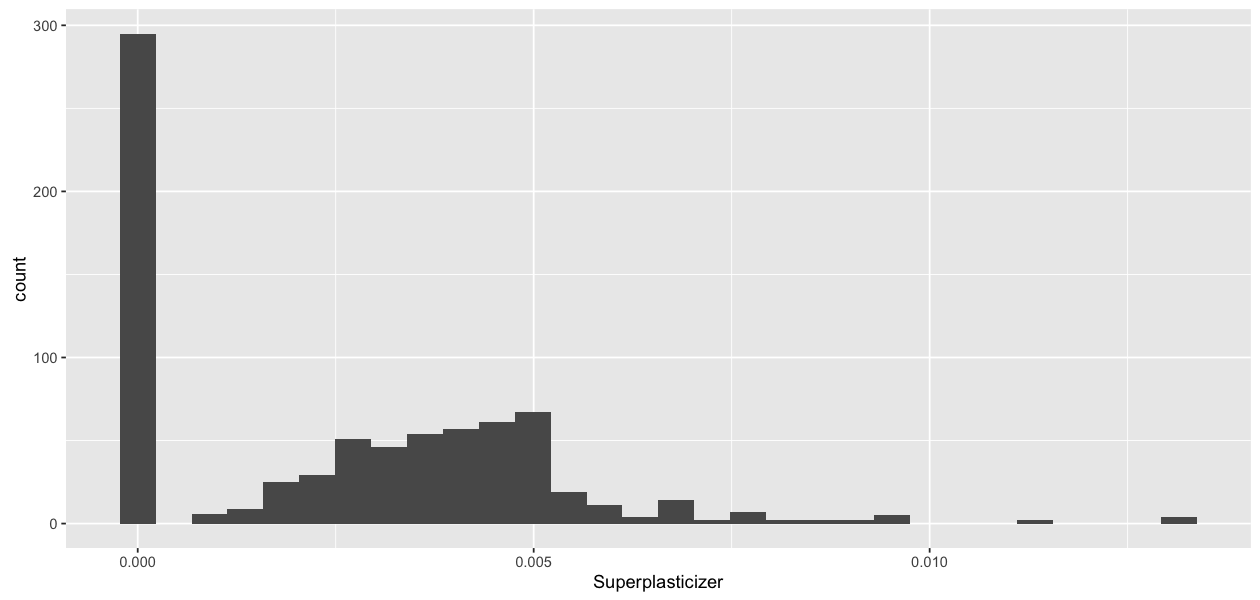

In [72]:
rm(list = ls())
library(AppliedPredictiveModeling)
data(concrete)
library(caret)
set.seed(975)
inTrain = createDataPartition(mixtures$CompressiveStrength, p = 3/4)[[1]]
training = mixtures[ inTrain,]
testing = mixtures[-inTrain,]
ggplot(data = training, aes(x = Superplasticizer)) + geom_histogram()

----
Preprocessing using PCA

In [73]:
rm(list = ls())
set.seed(3433)
library(AppliedPredictiveModeling)
data(AlzheimerDisease)
adData = data.frame(diagnosis,predictors)
inTrain = createDataPartition(adData$diagnosis, p = 3/4)[[1]]
training = adData[ inTrain,]
testing = adData[-inTrain,]

In [74]:
names <- colnames(training)
names <- names[grep("^IL",names)]
summary(training[,names])

     IL_11           IL_13           IL_16            IL_17E     
 Min.   :2.031   Min.   :1.240   Min.   :0.9568   Min.   :1.052  
 1st Qu.:3.706   1st Qu.:1.274   1st Qu.:2.4613   1st Qu.:4.149  
 Median :4.805   Median :1.283   Median :2.9245   Median :4.803  
 Mean   :4.700   Mean   :1.284   Mean   :2.9146   Mean   :4.905  
 3rd Qu.:5.682   3rd Qu.:1.290   3rd Qu.:3.3514   3rd Qu.:5.631  
 Max.   :7.801   Max.   :1.317   Max.   :4.9367   Max.   :8.952  
   IL_1alpha           IL_3             IL_4             IL_5         
 Min.   :-8.517   Min.   :-5.915   Min.   :0.5306   Min.   :-1.04982  
 1st Qu.:-7.849   1st Qu.:-4.269   1st Qu.:1.4586   1st Qu.:-0.09431  
 Median :-7.543   Median :-3.963   Median :1.8083   Median : 0.18232  
 Mean   :-7.537   Mean   :-3.950   Mean   :1.7649   Mean   : 0.18759  
 3rd Qu.:-7.264   3rd Qu.:-3.576   3rd Qu.:2.0794   3rd Qu.: 0.47000  
 Max.   :-5.952   Max.   :-2.453   Max.   :3.0445   Max.   : 1.16315  
      IL_6          IL_6_Receptor        

In [75]:
preProcess(training[,names],method="pca", thresh=0.9)

Created from 251 samples and 12 variables

Pre-processing:
  - centered (12)
  - ignored (0)
  - principal component signal extraction (12)
  - scaled (12)

PCA needed 9 components to capture 90 percent of the variance

----

In [76]:
rm(list= ls())
set.seed(3433)
library(caret)
library(AppliedPredictiveModeling)
library(Hmisc)
data(AlzheimerDisease)
adData = data.frame(diagnosis,predictors)
inTrain = createDataPartition(adData$diagnosis, p = 3/4)[[1]]
training = adData[ inTrain,]
testing = adData[-inTrain,]

In [77]:
# Create a subset of testing and training datasets
names <- colnames(training)
names <- names[grep("^IL",names)]
train <- training[,names]
test <- testing[,names]
preProc <- preProcess(train,method="pca", thresh=0.8)

In [78]:
g1 <- caret::train(training$diagnosis ~ ., method="glm", data=train)
mean(testing$diagnosis == predict(g1, test))

[1] 0.6463415